Step 1: Importing necessary libraries. However, we shall import remaining libraries once we open the required dataset and the needed alogorithms.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Step 2: This is an classification dataset ie Binary classification. Output column being 'target'. Therefore, we shall import classifications algorithm.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score,f1_score as score

Step 3: Exploratory Data Analysis

In [4]:
df.isna().sum() # No null values. That's great. We don't have to perform any cleansing techniques.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.shape

(303, 14)

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Step 4: Visualizing the dataset

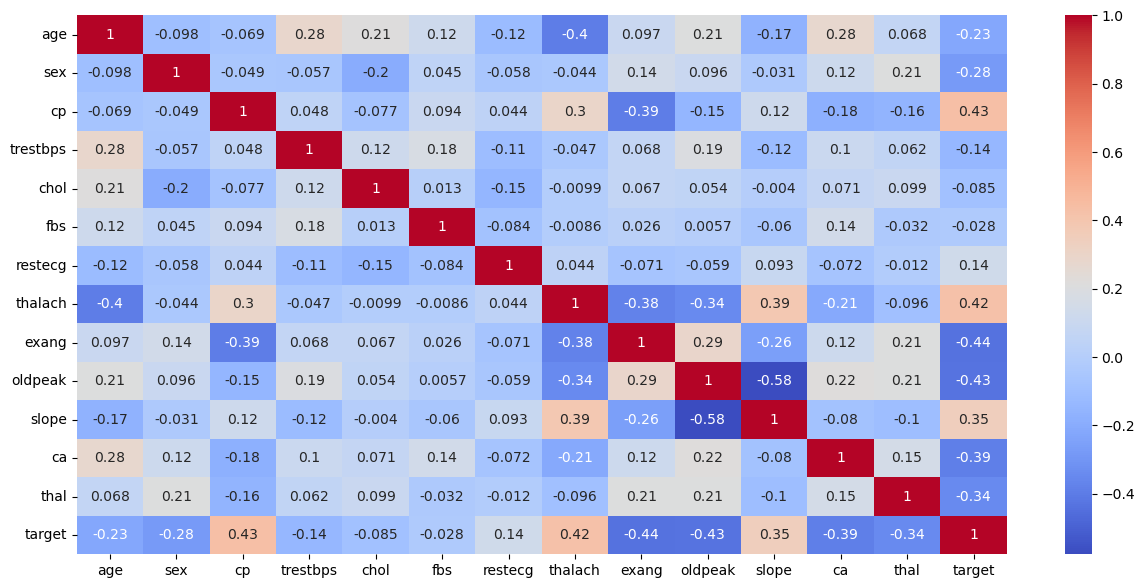

In [9]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)
plt.show()

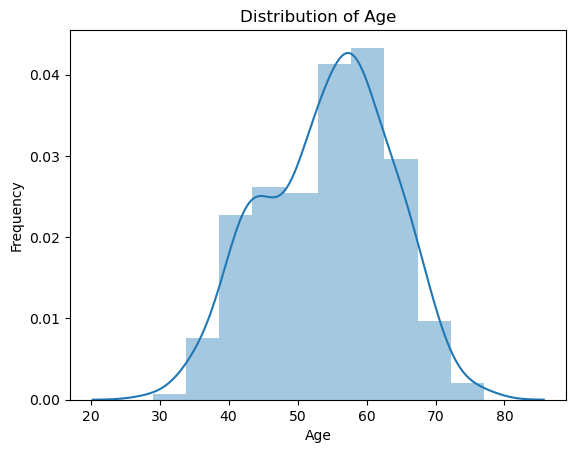

In [10]:
sns.distplot(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

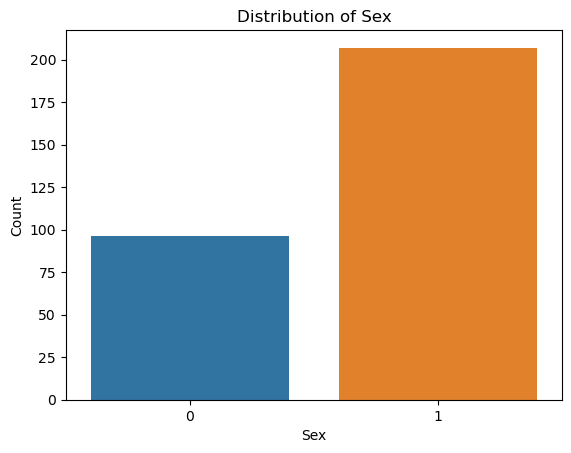

In [11]:
sns.countplot(x='sex', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()


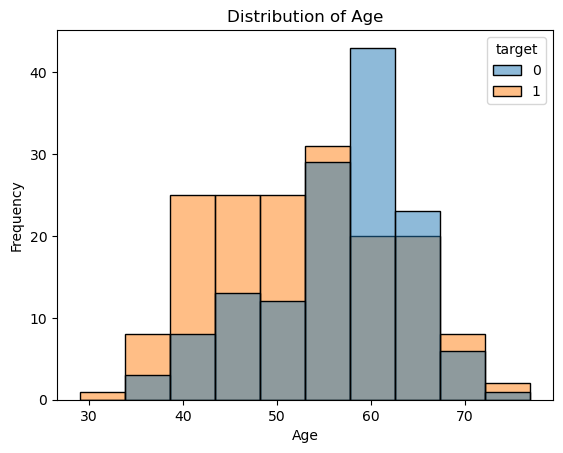

In [12]:
sns.histplot(data=df, x='age', hue='target', bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

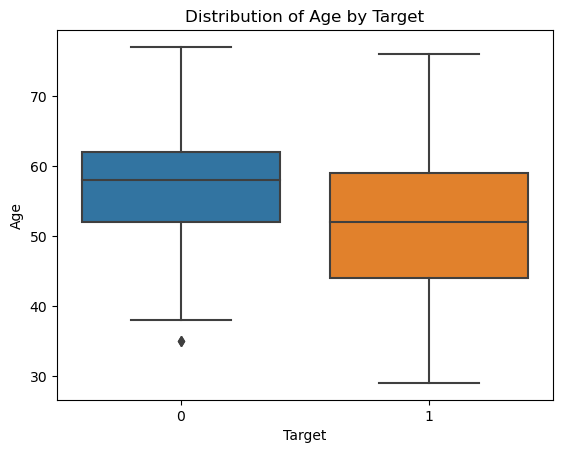

In [13]:
sns.boxplot(x='target', y='age', data=df)
plt.xlabel('Target')
plt.ylabel('Age')
plt.title('Distribution of Age by Target')
plt.show()

Step 5: Our model is ready to be trained. 

In [14]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8, random_state=42, stratify=y)

In [16]:
xg = XGBClassifier()
xg.fit(x_train,y_train)
y_pred = xg.predict(x_test)
xg_acc = accuracy_score(y_test,y_pred)
xg_acc

0.8032786885245902

To perform grid search for hyperparameter tuning in XGBoost, you can use the `GridSearchCV` class from scikit-learn. Here's an example code snippet:

Note that you may need to adjust the parameter grid and other settings based on your specific requirements and the hyperparameters you want to tune.

In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)


# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
f1_score = score(y_test, y_pred)
roc_score = roc_auc_score(y_test, y_pred)
print("Test Accuracy:", accuracy)
print("f1_score:", f1_score)
print("roc_auc_score:", roc_score)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}
Best Accuracy: 0.8185374149659864
Test Accuracy: 0.8360655737704918
f1_score: 0.8648648648648648
roc_auc_score: 0.8241341991341993


Additionally, we could also use other classification algorithms like Logistic regression, Decision tree, Random forest & Support vector machines etc